In [9]:
# 데이터 활용 도구들
import numpy as np
import pandas as pd


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#훈련데이터와 성능 확인 데이터 확인
train_df = pd.read_csv("/Users/bagdeoggeun/File/Dataset/titanic/train.csv")
test_df = pd.read_csv("/Users/bagdeoggeun/File/Dataset/titanic/test.csv")

In [18]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train_df[['Pclass','Survived']].groupby(['Pclass'] , as_index=False).mean().sort_values(by = 'Survived')
#as_index: groupby로 묶은 column을 인덱스로 사용할 것인지 사용하지 않을 것인지 


,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [26]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by = 'Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


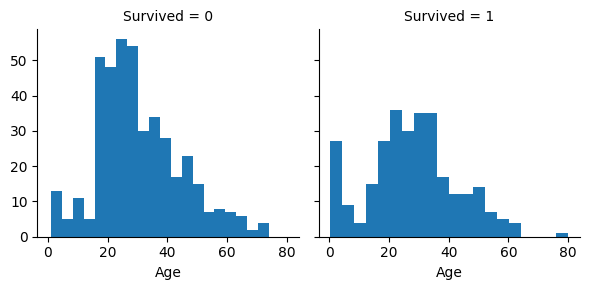

In [27]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

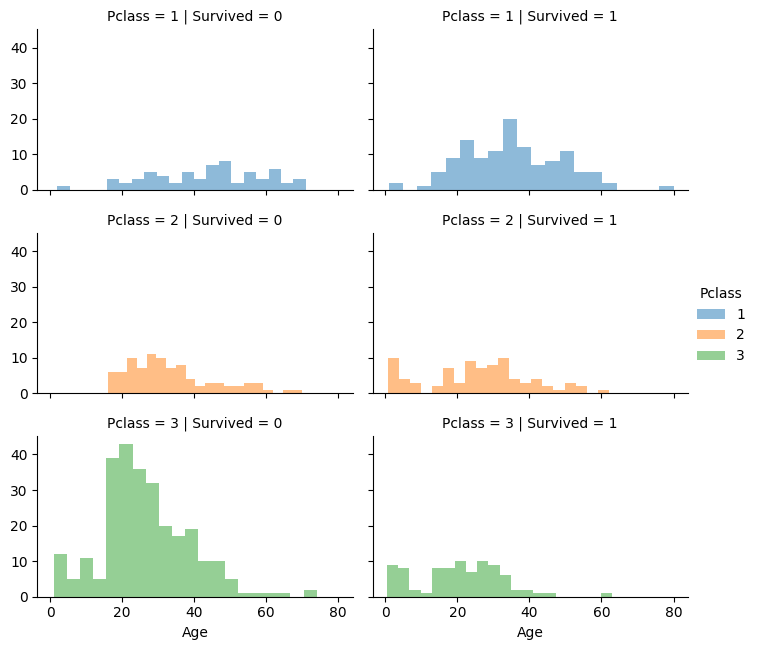

In [28]:
grid = sns.FacetGrid(train_df,col='Survived',row="Pclass",hue="Pclass",height=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

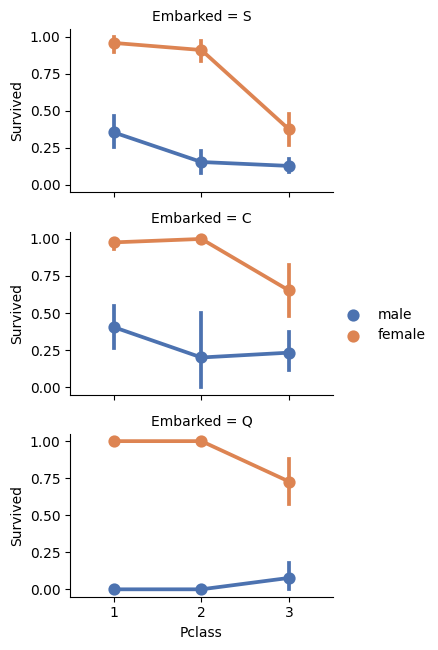

In [29]:
grid = sns.FacetGrid(train_df,row='Embarked',height=2.2,aspect=1.6)

grid.map(sns.pointplot,'Pclass','Survived','Sex',palette = 'deep',order = [1,2,3],hue_order = ["male","female"])

grid.add_legend()

# 승선지와 생존여부, 성별에 따른 요금(Fare)


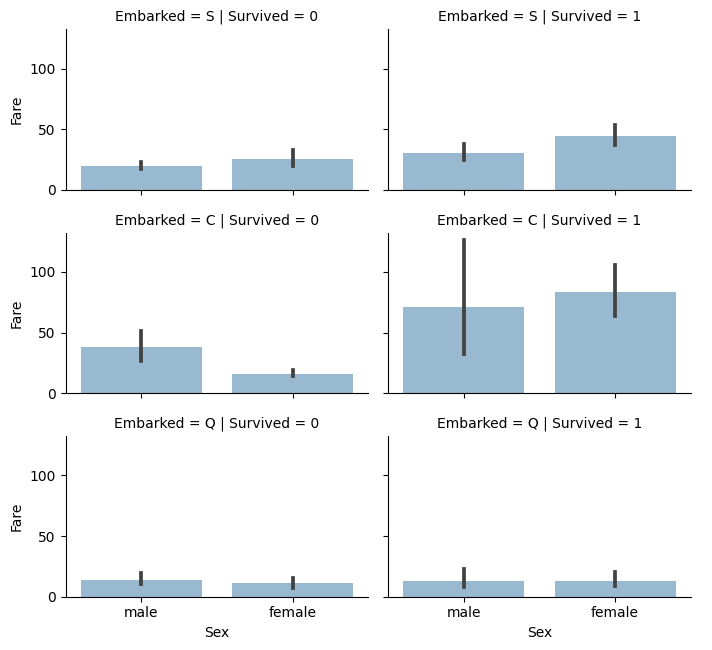

In [32]:
grid = sns.FacetGrid(train_df,row='Embarked',col='Survived',height=2.2,aspect=1.6)

grid.map(sns.barplot,'Sex','Fare',alpha=.5,order=["male","female"])

grid.add_legend()

## 데이터 전처리

In [36]:
train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Tickets','Cabin'],axis=1)
combine = [train_df,test_df]


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)`',expand=False)

pd.crosstab(train_df[''])